In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/signature95/tistory/main/dataset/boston.csv")
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  CAT. MEDV  
0       15.3  396.90   4.98  24.0          0  
1       17.8  396.90   9.14  

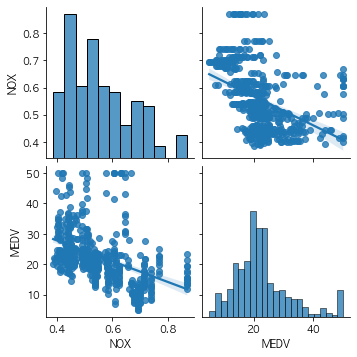

In [5]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = data[{'MEDV', 'NOX'}]

# 각 데이터의 히스토그램과 산점도를 도출 (산점도에는 회귀선까지 구현 kind='reg'를 사용)
sns.pairplot(sub, kind='reg')
plt.show()

In [25]:
# 라이브러리 호출 
from scipy.stats import shapiro # 정규분포를 따르도록 랜덤하게 값을 부여 

for i in ['MEDV', 'NOX']:
    print(shapiro(data[i]))

ShapiroResult(statistic=0.9171748757362366, pvalue=4.940195786292171e-16)
ShapiroResult(statistic=0.9356356263160706, pvalue=5.775580887027246e-14)


In [7]:
# 하나씩 시행해보기

# 만약 표본상관계수를 도출하게 된다면 (n-1로 또 나눠주어야 함)
# mu = mean (공통적으로 적용)
mu_1 = np.sum(data['MEDV'])/len(data['MEDV'])
mu_2 = np.sum(data['NOX'])/len(data['NOX'])
# 분산을 구하는 부분에서도 모분산 추정이므로 자유도 1 설정
var_1 = np.sum([pow(i - mu_1, 2) for i in data['MEDV']]) / (len(data['MEDV']) - 1)
var_2 = np.sum([pow(i - mu_2, 2) for i in data['NOX']]) / (len(data['NOX']) - 1)
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

covariance_ddof = sum( (data['MEDV'] - mu_1) * (data['NOX'] - mu_2) ) / (len(data['MEDV']) -1)
correlation_ddof = covariance_ddof / (std_1 * std_2)

# COV(X,Y) : 표본인 경우 (numpy와 비교)
print(covariance_ddof)
print(np.cov(data['MEDV'],data['NOX']))
# 피어슨 상관계수
print(correlation_ddof)

-0.45541243165186046
[[ 8.45867236e+01 -4.55412432e-01]
 [-4.55412432e-01  1.34276357e-02]]
-0.42732077237328225


In [8]:
# 피어슨 상관계수를 구하는 다른 방법으로는 scipy라이브러리를 활용하는 법

from scipy.stats import pearsonr
# 귀무가설은 '두 데이터의 상관 계수가 0이다.(독립)'로 설정되어 있음.
pearsonr(data['MEDV'], data['NOX'])

(-0.42732077237328253, 7.065041586251507e-24)

In [9]:
def cov_pearson(data1, data2, population = True):
    # 라이브러리 호출
    import numpy as np
    from scipy.stats import pearsonr

    # 변수를 설정하는 부분입니다.
    mu_1 = np.sum(data1)/len(data1)
    mu_2 = np.sum(data2)/len(data2)
    var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1))
    var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2))
    std_1 = var_1 ** 0.5
    std_2 = var_2 ** 0.5
    
    # 데이터가 모수인지 표본인지에 따라 자유도를 산입할지 여부를 결정합니다.
    if population == True:
        covariance = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1))
        correlation = covariance / (std_1 * std_2)
        print(f'모집단 data 각각의 분산 값은 COV(X,X) = {round(var_1,3)}, COV(Y,Y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'모집단 data에 대한 공분산 값 : {round(covariance,3)}')
        print(f'모집단 data에 대한 피어슨 상관계수 값 : {round(correlation,3)}')
    else:
        var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1) - 1)
        var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2) - 1)
        std_1 = var_1 ** 0.5
        std_2 = var_2 ** 0.5
        covariance_ddof = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1) -1)
        correlation_ddof = covariance_ddof / (std_1 * std_2)
        print(f'표본 data 각각의 추정된 분산 값은 COV(x,x) = {round(var_1,3)}, COV(y,y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'표본 data로 추정한 모집단의 공분산 값 : {round(covariance_ddof,3)}')
        print(f'표본 data로 추정한 모집단의 피어슨 상관계수 값 : {round(correlation_ddof,3)}')

    # Scipy 라이브러리에서 구한 피어슨 계수를 통해 위에서 확인한 상관계수 값을 검증해봅니다.
    print(f'Scipy로 구한 피어슨 상관계수는 {round(pearsonr(data1, data2)[0], 3)}입니다.')
    
    # Scipy에서 제공하는 피어슨 검정의 P값을 이용하여 데이터 간의 독립성에 대한 검정 결과 해석을 출력합니다.
    if pearsonr(data1, data2)[1] < 0.05:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

cov_pearson(data['MEDV'], data['NOX'], False)

표본 data 각각의 추정된 분산 값은 COV(x,x) = 84.587, COV(y,y) = 0.013(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : -0.455
표본 data로 추정한 모집단의 피어슨 상관계수 값 : -0.427
Scipy로 구한 피어슨 상관계수는 -0.427입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 0.0%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


In [33]:
# 위의 표를 참고 (diff는 변수 X의 순위 - 변수 Y의 순위를 의미함)
X = [10,20,1,90]
Y = [40,87,15,1]
diff = [-1, -1, -1, 3]
n = 4

sum_diff = 6 * sum([pow(i, 2) for i in diff])
spearman = 1 - sum_diff/(n * (n ** 2 -1))
print(spearman)

# scipy를 활용한 스피어만 상관계수 출력
from scipy.stats import spearmanr
print(spearmanr(X,Y)[0])

# 극단치가 있는 X,Y에 대해 피어슨 상관계수를 도출해봄
cov_pearson(X,Y,False)

-0.19999999999999996
-0.19999999999999998
표본 data 각각의 추정된 분산 값은 COV(x,x) = 1646.917, COV(y,y) = 1427.583(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : -693.583
표본 data로 추정한 모집단의 피어슨 상관계수 값 : -0.452
Scipy로 구한 피어슨 상관계수는 -0.452입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 54.766000000000005%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.


In [10]:
# 스피어만 계수는 순위합으로 도출되는데, 이를 구현하기 위해 임의의 데이터를 형성하도록 함


# transform data (데이터의 MEDV, NOX를 인코딩하는 작업)
result = encoder.fit_transform(data[{'MEDV', 'NOX'}])
result = pd.DataFrame(result, columns={'MEDV', 'NOX'})
# 순위 척도의 차이를 도출하는 부분
result['diff'] = result['MEDV'] - result['NOX']
# 데이터 개수 지정
n = len(result['diff'])

# 스피어만 계수 산출하는 부분 (스피어만 계수 산출 공식 적용)
sum_diff = 6 * sum([pow(i, 2) for i in result['diff'].tolist()])
spearman = 1 - sum_diff/(n * (n ** 2 -1))
spearman


0.7865307909746467

In [34]:
# 스피어만 (변수가 모두 연속형이며, 정규성을 따르지 않는 경우에 사용한다)
from scipy.stats import spearmanr

spearmanr(data['MEDV'], data['NOX'])

SpearmanrResult(correlation=-0.5626088297953195, pvalue=1.4059853091979118e-43)

In [12]:
cov_pearson(result['MEDV'], result['NOX'], False)


표본 data 각각의 추정된 분산 값은 COV(x,x) = 3410.611, COV(y,y) = 470.593(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : -668.902
표본 data로 추정한 모집단의 피어슨 상관계수 값 : -0.528
Scipy로 구한 피어슨 상관계수는 -0.528입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 0.0%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


In [39]:
from scipy.stats import kendalltau

X = [10,20,1,90]
Y = [40,87,15,1]

kendalltau(X,Y)

KendalltauResult(correlation=0.0, pvalue=1.0)

In [43]:
X = [12, 2, 1, 11, 3]
Y = [1, 4, 7, 2, 0]

kendalltau(X,Y)

KendalltauResult(correlation=-0.6, pvalue=0.23333333333333334)

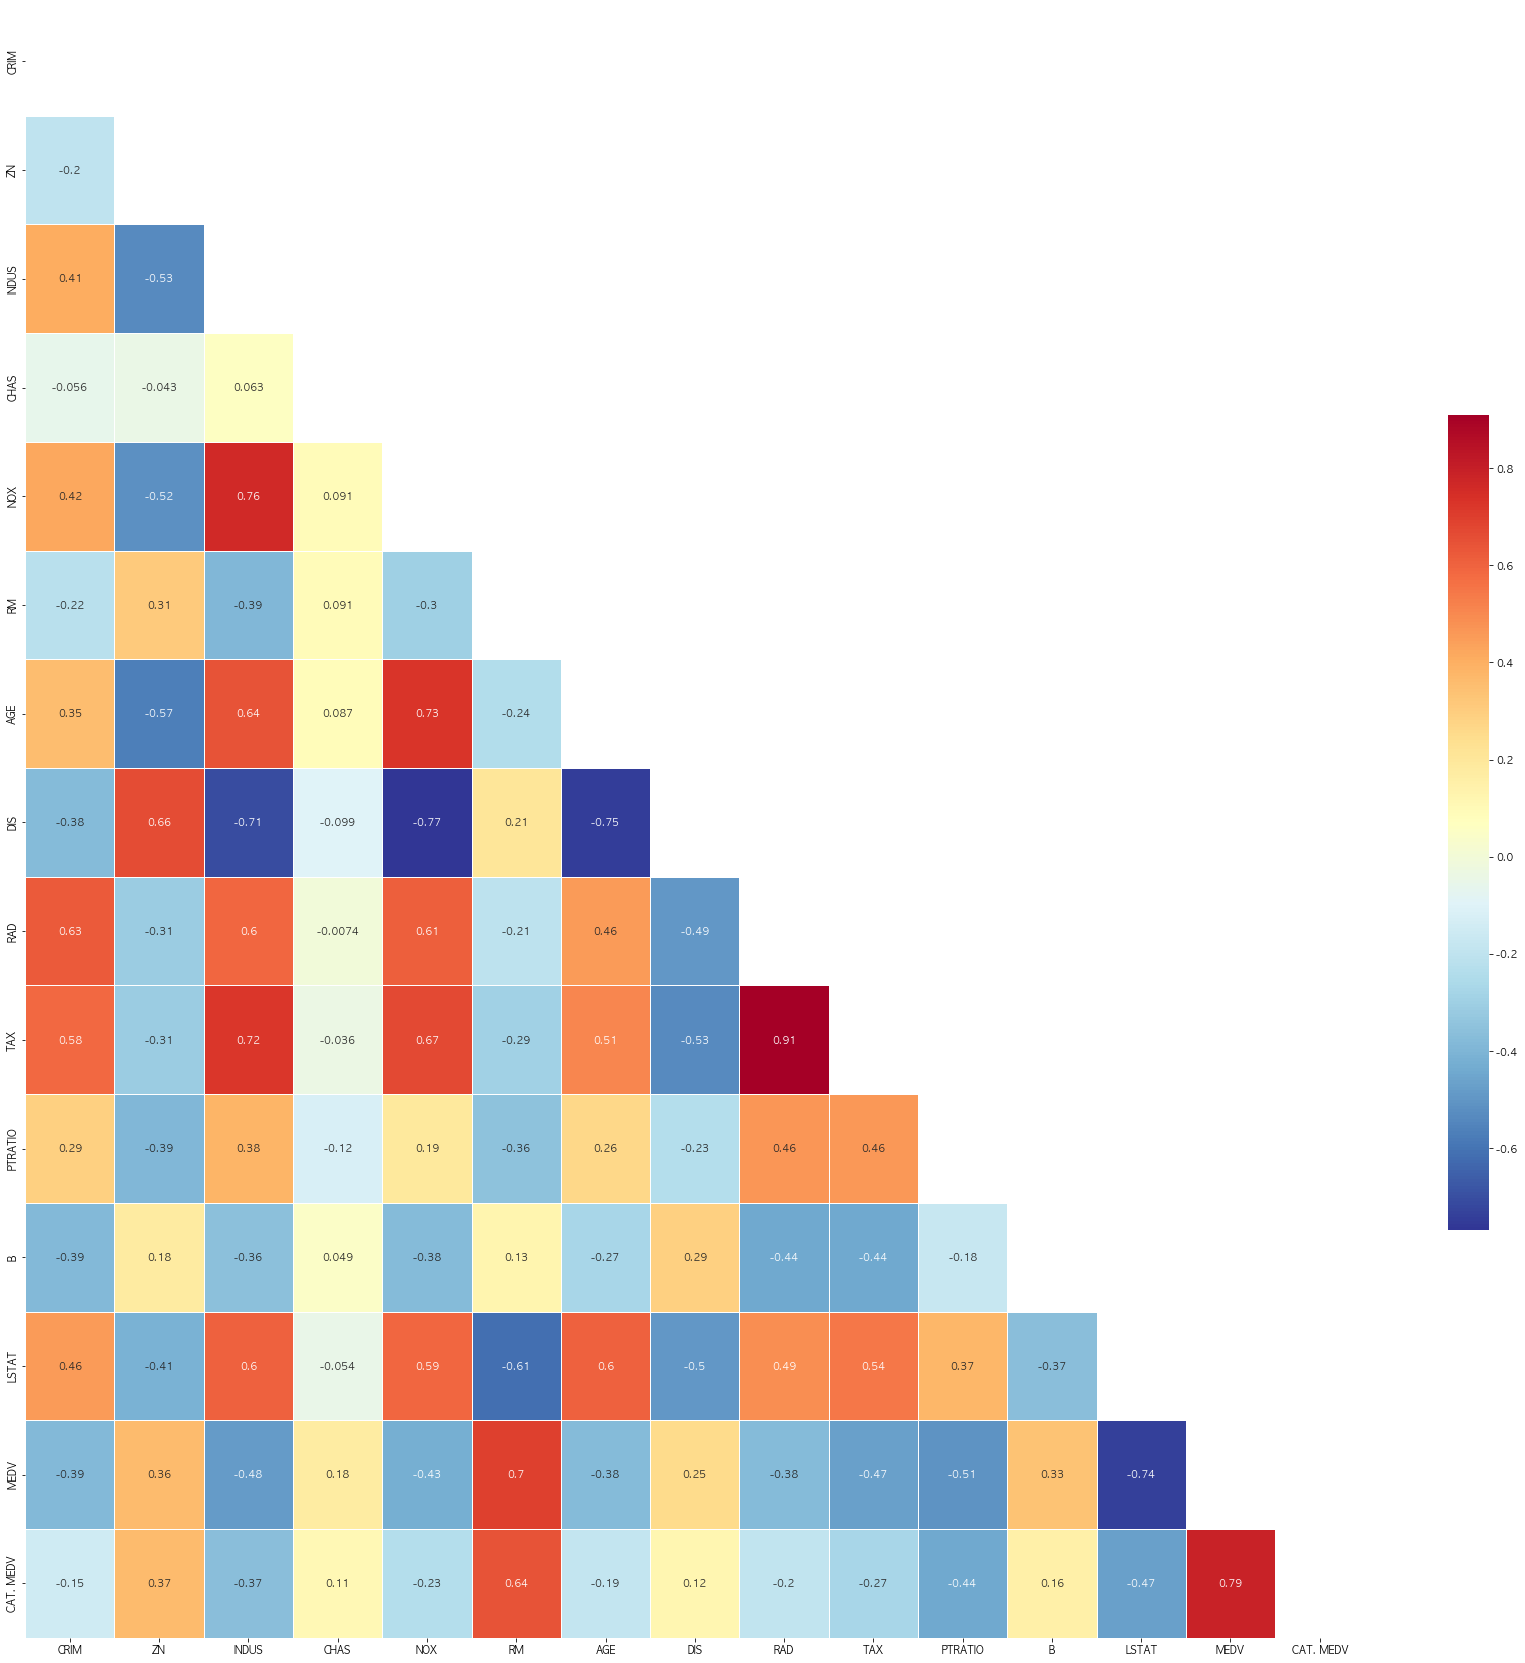

In [15]:
# corr 시각화
def corr_heatmap(dataset):
    """[상관관계 그래프]

    Args:
        dataset ([DataFrame]): [데이터프래임을 입력해주세요]
    """
    # 라이브러리 호출
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    # 한글폰트 출력 가능 코드
    from matplotlib import rc
    rc('font', family='AppleGothic') # Mac Os
    #rc('font', family='NanumGothic') # Windows Os
    plt.rcParams['axes.unicode_minus'] = False
    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(30,30))
    sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 10}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(data)